In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Creating Arrays

In [17]:
a1 = np.array([3,5,7,3])
a2 = np.zeros(10)
a3 = np.ones(10)
a4 = np.random.random(10)
a5 = np.random.randn(10)
a6 = np.linspace(0, 10, 100)
a7 = np.arange(0, 10, 0.02)

# Array Operations

In [22]:
2*a1

array([ 6, 10, 14,  6])

In [23]:
1/a1

array([0.33333333, 0.2       , 0.14285714, 0.33333333])

In [27]:
1/a1 + a1 + 2

array([5.33333333, 7.2       , 9.14285714, 5.33333333])

In [33]:
x = np.linspace(0, 1, 100)
y = x**2

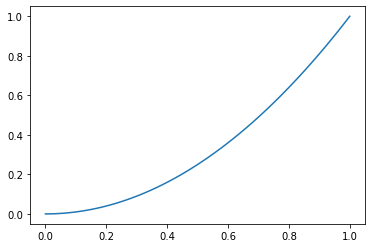

In [34]:
plt.plot(x, y)

(array([2., 1., 1., 0., 2., 0., 1., 1., 0., 2.]),
 array([0.13708825, 0.21726841, 0.29744857, 0.37762873, 0.45780889,
        0.53798905, 0.61816921, 0.69834937, 0.77852953, 0.85870969,
        0.93888985]),
 <BarContainer object of 10 artists>)

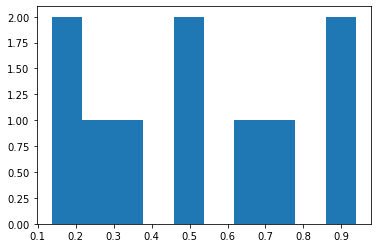

In [35]:
plt.hist(a4)

In [37]:
def f(x):
    return x**2 * np.sin(x) / np.exp(-x)

x = np.linspace(0, 10, 100)
y = f(x)

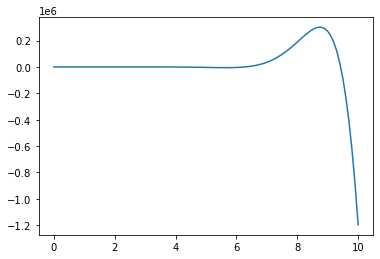

In [38]:
plt.plot(x,y)

List of many many mathematical functions here:

https://numpy.org/doc/stable/reference/routines.math.html

# Array Indexing/Slicing

In [39]:
a1 = np.array([2,4,6,8,10])

In [44]:
a1[2]

6

In [45]:
a1[2:]

array([ 6,  8, 10])

In [46]:
a1[:-2]

array([2, 4, 6])

In [47]:
a1[1:-2]

array([4, 6])

In [49]:
a1[a1>3]

array([ 4,  6,  8, 10])

In [59]:
names = np.array(['Jim', 'Luke', 'Josh', 'Pete'])
first_letter_j = np.vectorize(lambda s: s[0])(names)=='J'
names[first_letter_j]

array(['Jim', 'Josh'], dtype='<U4')

In [64]:
a1[a1%4 == 0]

array([4, 8])

# Calculus / Statistical Functions

In [65]:
a1 = 2*np.random.randn(10000) + 10

Mean, standard deviation, and percentiles of arrays:

In [67]:
np.mean(a1)

9.989611332217816

In [68]:
np.std(a1)

2.0025019729901112

In [69]:
np.percentile(a1, 80)

11.678070990477668

Integrals and derivatives

In [79]:
x = np.linspace(1, 10 ,100)
y = 1/x**2 * np.sin(x)
dydx = np.gradient(y, x)
y_int = np.cumsum(y) * (x[1]-x[0])

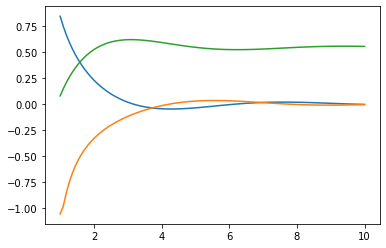

In [80]:
plt.plot(x,y)
plt.plot(x, dydx)
plt.plot(x, y_int)

# Examples

## Question 1:

Let $y=e^{-x/10} \sin(x)$. Consider 10000 $x$ intervals in the range $[0,10]$

1. Plot the function $y$ vs. $x$ in the range $[0, 10]$. 
2. Compute the mean and standard deviation of $y$ for $x$ values in $[4,7]$
3. For $x$ in the range $[4,7]$, find the value $y_m$ such that 80% of $y$ values are less than $y_m$
4. Plot $dy/dx$ vs $x$
5. Find the locations where $dy/dx=0$ 

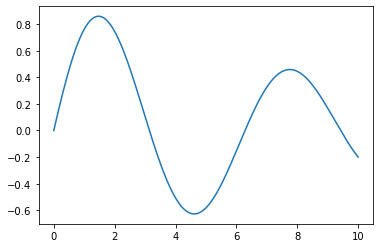

In [81]:
#1 
N= 10000
x = np.linspace(0,10, N+1)
y = np.exp(-x/10)*np.sin(x)
plt.plot(x,y)

In [87]:
#2
np.mean(y[(x>=4)*(x<=7)])
np.std(y[(x>=4)*(x<=7)])

0.31448753875085117

In [88]:
#3 
np.percentile(y[(x>=4)*(x<=7)], 80)

0.06145551274590662

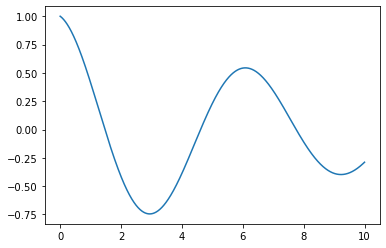

In [89]:
#4
plt.plot(x, np.gradient(y,x))

In [90]:
#5
dydx = np.gradient(y, x)

In [99]:
x[1:][dydx[1:] * dydx[:-1] < 0]

array([1.472, 4.613, 7.755])

# Question 2:

Sum together every number from 0 to 10000 except for those than can be divided by 4 or 7. Do this in one line of code

In [108]:
nums = np.arange(0, 10001, 1)
sum(nums[(nums%4 != 0) * (nums%7 != 0)])

32147142

## Question 3:

Consider the flower petal $r(\theta) = 1+\frac{3}{4}\sin(3 \theta)$ for $0 \leq \theta \leq 2 \pi$

1. Make a plot of the flower (find x and y points)
2. Compute the area using the calculus formula $A = \int_{0}^{2\pi} \frac{1}{2} r^2 d\theta$
3. Compute the arclength using the calculus formula $L = \int_{0}^{2 \pi} \sqrt{r^2 + \left(\frac{dr}{d\theta}\right)^2} d\theta$

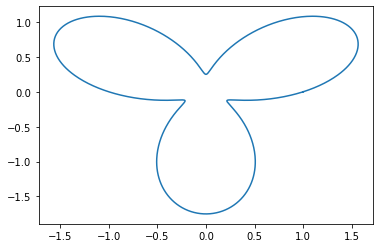

In [114]:
# 1
theta = np.linspace(0, 2*np.pi, 1000)
r = 1+ 3/4 * np.sin(3*theta)
x = r*np.cos(theta)
y = r * np.sin(theta)
plt.plot(x,y)

In [115]:
#2 
A = 1/2 * sum(r**2) * (theta[1]-theta[0])
A

4.028310324802908

In [117]:
#3
sum(np.sqrt(r**2 + np.gradient(r, theta)**2)) * (theta[1]-theta[0])

11.640021569013872

## Question 4:

The power emitted by a blackbody is $P = A \sigma \epsilon T^4$. After measuring the temperature of a star you find that $T(t) = T_0 \frac{1}{1+e^{-kt}}$. Plot the total energy emitted by the star as a function of time using the fact that $E(t) = \int_{t'=0}^{t'=t} P(t') dt' $

$$ P / (A \sigma \epsilon T_0^4) = \left( \frac{1}{1+e^{-kt}} \right)^4 $$

In [120]:
kt = np.linspace(0, 3, 100)
P = (1/(1+np.exp(-kt)))**4
E = np.cumsum(P) * (kt[1] - kt[0])

Text(0, 0.5, '$\\left(\\frac{k}{A \\sigma \\epsilon T_0^4}\\right) E(kt)$')

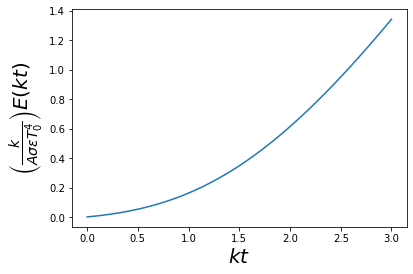

In [127]:
plt.plot(kt, E)
plt.xlabel('$kt$', fontsize=20)
plt.ylabel(r'$\left(\frac{k}{A \sigma \epsilon T_0^4}\right) E(kt)$', fontsize=20)

# Multi-Dimensional Arrays

Creating multi dimensional arrays

In [128]:
a1 = np.array([[4,6,4],[1,2,2],[6,8,7]])

Operations work in a similar way

In [132]:
2/a1

array([[0.5       , 0.33333333, 0.5       ],
       [2.        , 1.        , 1.        ],
       [0.33333333, 0.25      , 0.28571429]])

Can turn any n-dimensional array to a 1d array using `ravel()` method

In [134]:
a1

array([[4, 6, 4],
       [1, 2, 2],
       [6, 8, 7]])

In [133]:
a1.ravel()

array([4, 6, 4, 1, 2, 2, 6, 8, 7])

Boolean indexing

In [135]:
a1>5

array([[False,  True, False],
       [False, False, False],
       [ True,  True,  True]])

In [136]:
a2 = np.random.randn(3,3)

In [139]:
a2

array([[ 2.45803233e-01,  4.02224687e-01, -1.51907933e+00],
       [-1.53987499e-03, -2.28138389e+00, -6.25382720e-01],
       [-9.50604990e-01, -8.06604916e-01,  9.70273187e-01]])

In [138]:
a2[a1>5]

array([ 0.40222469, -0.95060499, -0.80660492,  0.97027319])

Element indeing

In [143]:
a1

array([[4, 6, 4],
       [1, 2, 2],
       [6, 8, 7]])

In [149]:
a1[1:,:2]

array([[1, 2],
       [6, 8]])

# Dealing with 2D functions

Function in 2 dimensions. Try this...

In [152]:
x = np.linspace(0, 10, 1000)
y = np.linspace(0, 10, 1000)

Need to use meshgrids

In [155]:
xv, yv = np.meshgrid(x, y)

In [158]:
zv = xv**2 + yv**2

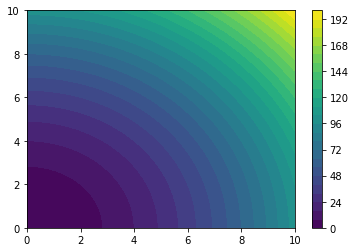

In [162]:
plt.contourf(xv, yv, zv, levels=30)
plt.colorbar()

# Basic Linear Algebra

## Matrix Operations

In [165]:
A = np.array([[3,2,1],[5,-5,4],[6,0,1]])
b1 = np.array([1,2,3])
b2 = np.array([-1,2,-5])

In [168]:
A

array([[ 3,  2,  1],
       [ 5, -5,  4],
       [ 6,  0,  1]])

In [169]:
b1

array([1, 2, 3])

In [167]:
A@b1

array([10,  7,  9])

In [170]:
A.T

array([[ 3,  5,  6],
       [ 2, -5,  0],
       [ 1,  4,  1]])

In [171]:
np.dot(b1, b2)

-12

In [172]:
np.cross(b1,b2)

array([-16,   2,   4])

## Systems of Equations

$ 3x + 2y + z = 4$

$ 5x -5y + 4z = 3$

$ 6x +z = 0$

In [174]:
A = np.array([[3,2,1],[5,-5,4],[6,0,1]])
c = np.array([4,3,0])

In [175]:
np.linalg.solve(A,c)

array([-0.49056604,  1.26415094,  2.94339623])

## Finding Eigenvalues

In [176]:
A = np.array([[4,2,2],[2,4,2],[2,2,4]])

In [181]:
w, v = np.linalg.eig(A)

In [185]:
v1 = v[:,0]
v1

array([-0.81649658,  0.40824829,  0.40824829])

In [187]:
A@v1

array([-1.63299316,  0.81649658,  0.81649658])

In [188]:
w[0] * v1

array([-1.63299316,  0.81649658,  0.81649658])

# Examples

## Question 1

Let $f(x,y) = e^{-(x^2+y^2)} \cdot \sin(x)$ for $-2 \leq x \leq 2$ and $-2 \leq y \leq 2$

1. Make a contour plot of $f$
2. Find the volume $|f(x,y)|$ in the specified $x$ and $y$ range
3. Find the volume $|f(x,y)|$ only in the region where $\sqrt{x^2+y^2}>0.5$ 

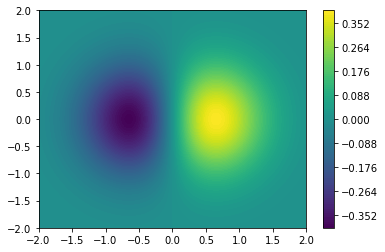

In [189]:
#1
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
xv, yv = np.meshgrid(x, y)
f = np.exp(-(xv**2 + yv**2)) * np.sin(xv)
plt.contourf(xv,yv,f, levels=100)
plt.colorbar()

In [199]:
#2
np.abs(f.ravel()).sum() * np.diff(x)[0] * np.diff(y)[0]

1.4861858145124311

In [202]:
# 3
np.abs(f[xv**2 + yv**2 > 0.5**2].ravel()).sum() * np.diff(x)[0] * np.diff(y)[0]

1.3447652930203164

## Question 2

After examining a circuit full of resistors, you find that the voltage at 4 specified points is given by

$ 3V_1 + 2V_2 + 3V_3 + 10V_4 = 4$

$ 2V_1 - 2V_2 + 5V_3 + 8V_4 = 1$

$ 3V_1 + 3V_2 + 4V_3 + 9V_4 = 3$

$ 3V_1 + 4V_2 - 3V_3 - 7V_4 = 2$

Find all the voltages

In [203]:
A = np.array([[3,2,3,10],[2,-2,5,8],[3,3,4,9],[3,4,-3,-7]])
c = np.array([4,1,3,2])
np.linalg.solve(A,c)

array([ 0.78378378,  0.03603604, -0.67567568,  0.36036036])

## Question 3 (tougher)

An electric field is given by $\vec{E}(z,t) = E_0 \cos (z-t) \hat{x} + 2E_0 \cos(z-t+\pi/2) \hat{y}$. 

1. Find the magnetic field for all $z \in [0,4\pi]$ and $t \in [0,10]$ using $\vec{B}(z,t) = \hat{z} \times \vec{E}(z,t)$
2. Compute the Poynting vector $\vec{S} = \vec{E} \times \vec{B}$ for all $z$ and $t$

In [207]:
#1 
z = np.linspace(0, 4*np.pi, 100)
t = np.linspace(0, 10, 100)

tv, zv = np.meshgrid(t,z)

Ex = np.cos(zv-tv)
Ey = 2*np.cos(zv-tv + np.pi/2)
Ez = 0*tv

$E_x$ as function of $t$ at $z=0$

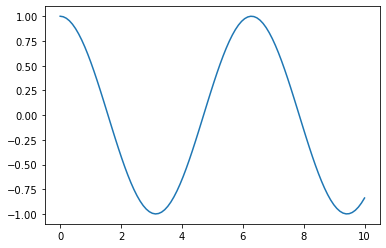

In [210]:
plt.plot(t, Ex[0])

$E_x$ as function of $z$ at $t=0$

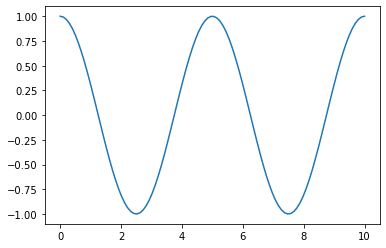

In [211]:
plt.plot(t, Ex[:,0])

In [214]:
E = np.array([Ex, Ey, Ez])
E = np.swapaxes(E, 0, -1)

In [216]:
B = np.cross(np.array([0,0,1]), E)

In [218]:
B = np.swapaxes(B, 0, -1)

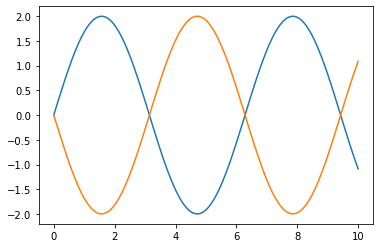

In [221]:
Bx, By, Bz = B
plt.plot(t, Ey[0])
plt.plot(t, Bx[0])

In [229]:
#3
S = np.cross(E, B)

In [232]:
S= np.swapaxes(S, 0, -1)

In [234]:
Sx, Sy, Sz = S

## Question 4 (tougher)

Find the solutions to $\left(\frac{d^2}{dx^2} + (10x)^2\right) f = \lambda f$ with boundary conditions $f(0)=f(1)=0$

* use the eigenvalue method and the fact that $\frac{d^2 f}{dx^2} \approx \frac{f_{i+1} + f_{i-1} - 2f_i}{\Delta x^2}$ where $f_i = f(i \Delta x)$ and $i$ is an integer. 

In [238]:
N = 1000
x = np.linspace(0,1,N+1)
dx = x[1] - x[0]

In [243]:
main_diag = -2*np.ones(N-1)
off_diag = np.ones(N-2)
derivative_matrix = (np.diag(main_diag) + np.diag(off_diag, -1) + + np.diag(off_diag, 1))/dx**2
x2_matrix = np.diag((10*x[1:-1])**2)
LHS_matrix = derivative_matrix + x2_matrix

In [246]:
w, v = np.linalg.eigh(LHS_matrix)

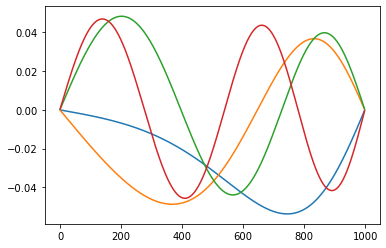

In [249]:
plt.plot(v[:,-1])
plt.plot(v[:,-2])
plt.plot(v[:,-3])
plt.plot(v[:,-4])

In [247]:
w[-1]

29.85532322242521

In [250]:
w[-2]

-10.806108653974633

In [251]:
w[-3]

-58.10082372779441

# Basic Datasets

In [262]:
names, heights = np.loadtxt('../../input/sample.csv', dtype='object', delimiter=',', unpack=True, skiprows=1)

In [265]:
names = names.astype(str)

In [266]:
names

array(['Jim', 'Mike', 'Bob', 'Susy', 'Tim', 'Frank'], dtype='<U5')

In [268]:

heights = heights.astype(float)

In [269]:
heights

array([172., 168., 182., 156., 170., 190.])